## Estadistica Aplicada

Pronostico

Jesus Adrian Cordero Hernandez 1952778

Gpo 41

In [2]:
## Librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

## 1. Descargar  la  base  de  datos con  base  en  el  video  adjunto,  se  debe  elegir  un periodo y en la notebook se debe justificar el periodo elegido.

In [4]:
datos = pd.read_excel('Indicadores.xlsx')
datos

,Periodos,IMCMI_SA
0,2013/01,90.086625
1,2013/02,90.595986
2,2013/03,90.514496
3,2013/04,90.204652
4,2013/05,90.909213
...,...,...
122,2023/03,106.762443
123,2023/04,107.928291
124,2023/05,107.775653
125,2023/06,108.168118


Elegi este periodo ya que la frecuencia de los datos es de forma mensual por lo que pienso que un tiempo de 10 años es una buena cantidad de informacion para la prediccion

## 2. Verificar tipo de variables y no existencia de missing values

In [5]:
datos.dtypes

Periodos     object
IMCMI_SA    float64
dtype: object

In [6]:
datos.isnull().sum()

Periodos    0
IMCMI_SA    0
dtype: int64

In [7]:
datos['Periodos']= pd.to_datetime(datos['Periodos'], format='%Y/%m')

In [8]:
## Index
datos = datos.set_index('Periodos')

In [9]:
## Frecuencia
datos = datos.asfreq('MS')

In [10]:
datos

,IMCMI_SA
Periodos,
2013-01-01,90.086625
2013-02-01,90.595986
2013-03-01,90.514496
2013-04-01,90.204652
2013-05-01,90.909213
...,...
2023-03-01,106.762443
2023-04-01,107.928291
2023-05-01,107.775653


In [11]:
datos.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='Periodos', length=127, freq='MS')

## 3. Gráfico de la serie (títulos, nombre a ejes etc)

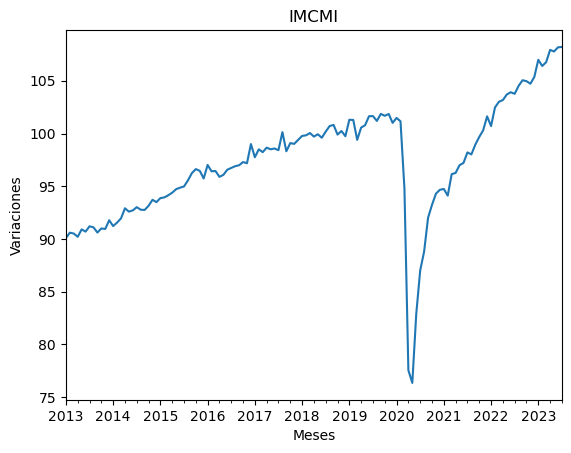

In [12]:
## Graficar
datos['IMCMI_SA'].plot()
plt.title('IMCMI')
plt.xlabel('Meses')
plt.ylabel('Variaciones');

## 4. Realiza un pronósticodel índice:

## a) Realiza una prueba de raíz unitaria a la serie original

In [13]:
## prueba de raiz unitaria
prueba_adf= adfuller(datos['IMCMI_SA'])
pvalue= prueba_adf[1]
pvalue.round(2)

0.3

Como el pvalue es de .3 no rechazamos ho lo que significa que el IMCMI es una serie no estacionaria

## b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie sea estacionaria

In [14]:
## Primeras dif
datos['1ras_diff']= datos['IMCMI_SA'].diff()

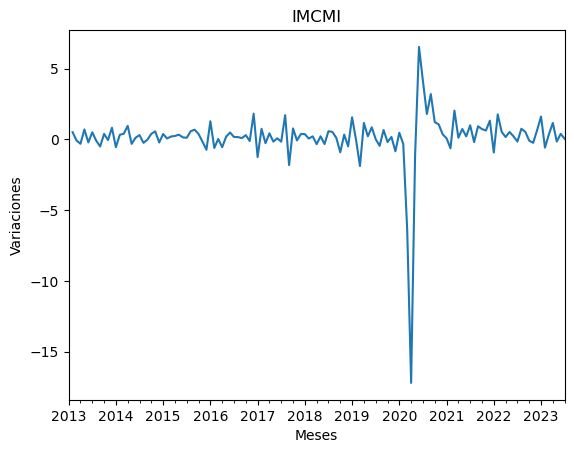

In [15]:
datos['1ras_diff'].plot()
plt.title('IMCMI')
plt.xlabel('Meses')
plt.ylabel('Variaciones');

In [16]:
## prueba de raiz unitaria
prueba_adf1= adfuller(datos['1ras_diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos ho, las primeras diferencias del IMCMI son un proceso estacionario

## c) Si  la  serie  no  es  estacionaria  repite  el  paso  b  hasta  que  la  serie  sea estacionaria.

## d) Realiza  las  graficas  de  autocorrelación  de  la  serie  estacionaria  para verificar si la serie tiene o no un componente estacional

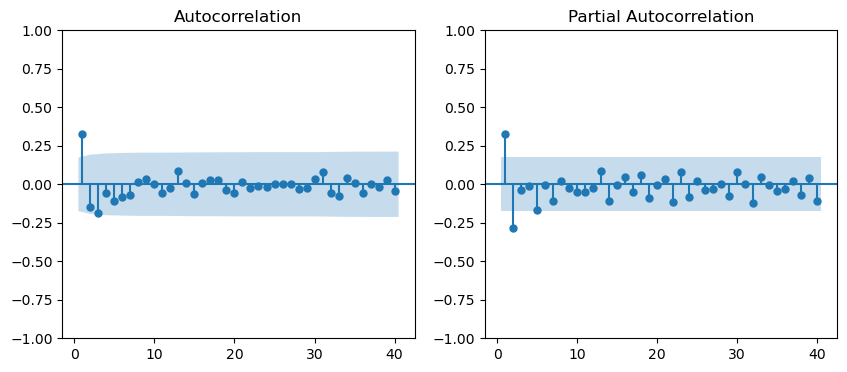

In [17]:
## Graficas de correlacion 
ig, ax = plt.subplots(1,2, figsize=(10,4))
## 1er
plot_acf(datos['1ras_diff'].dropna(), zero= False, lags=40,ax= ax[0])
## 2da
plot_pacf(datos['1ras_diff'].dropna(), zero= False, lags=40,ax= ax[1])
plt.show()

Esta serie no tiene componente estacional

## e) Utiliza auto_arima para encontrar el orden del modelo arima, dando el parámetro information_criterion,prueba y muestra el resultado, con aic, bic, hqic, oob.

In [18]:
## Determinar el orden del proceso 
arimaorder_aic= pm.auto_arima(datos['IMCMI_SA'],
                              start_p=1 ,start_q=1,
                              max_p=7, max_q=7,
                              information_criterion='aic')
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [19]:
arimaorder_aic= pm.auto_arima(datos['IMCMI_SA'],
                              start_p=1 ,start_q=1,
                              max_p=7, max_q=7,
                              information_criterion='bic')
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [20]:
arimaorder_aic= pm.auto_arima(datos['IMCMI_SA'],
                              start_p=1 ,start_q=1,
                              max_p=7, max_q=7,
                              information_criterion='hqic')
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [21]:
arimaorder_aic= pm.auto_arima(datos['IMCMI_SA'],
                              start_p=1 ,start_q=1,
                              max_p=7, max_q=7,
                              information_criterion='oob')
arimaorder_aic.params

c:\Users\HP\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

## f) Utilizar el método del if con AR y MA para ver que modelos sugieren el BIC y el AIC

In [22]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(datos['1ras_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 6


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 3


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 6


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
ic.sort_values('AIC').head()

,,AIC,BIC
AR,MA,,
3,4,502.589907,528.116445
4,3,503.377715,528.904252
5,3,503.925848,532.288667
2,3,504.356854,524.210827
4,4,504.454280,532.817099


In [24]:
ic.sort_values('BIC').head()

AIC         BIC
AR MA                        
0  1   508.085754  516.594599
2  0   505.817491  517.162618
1  2   504.830760  519.012170
0  3   505.246799  519.428208
   2   510.083173  521.428301

## g) Con los dos incisos anteriores elegir el orden ARIMA a estimar

Orden elegido es (0,1,1)

## h) Estimar el modelo

In [25]:
model= ARIMA(datos['IMCMI_SA'], order=(0,1,1))
results= model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                  127
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -251.250
Date:                Thu, 02 Nov 2023   AIC                            506.500
Time:                        16:30:23   BIC                            512.172
Sample:                    01-01-2013   HQIC                           508.804
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4183      0.039     10.749      0.000       0.342       0.495
sigma2         3.1540      0.127     24.914      0.000       2.906       3.402
Ljung-Box (L1) (Q):                   0.00   Jarque-

## i) Pronosticar tres periodos

In [26]:
forecast= results.get_forecast(steps=3)
forecast_mean= forecast.predicted_mean
forecast_ci= forecast.conf_int()

In [27]:
inicio= '2023-07-01'
fin= '2023-10-01'

In [28]:
pronostico_valor= forecast_mean[inicio:fin]
pronostico_intervalos= forecast_ci.loc[inicio:fin]

In [29]:
df_forecast= pd.DataFrame({'pronostico': pronostico_valor,
                           'limite inferior': pronostico_intervalos['lower IMCMI_SA'],
                           'limite superior': pronostico_intervalos['upper IMCMI_SA']})

In [30]:
df_forecast

,pronostico,limite inferior,limite superior
2023-08-01,108.121822,104.640998,111.602646
2023-09-01,108.121822,102.081135,114.162509
2023-10-01,108.121822,100.320306,115.923339


Text(0, 0.5, 'Variacion')

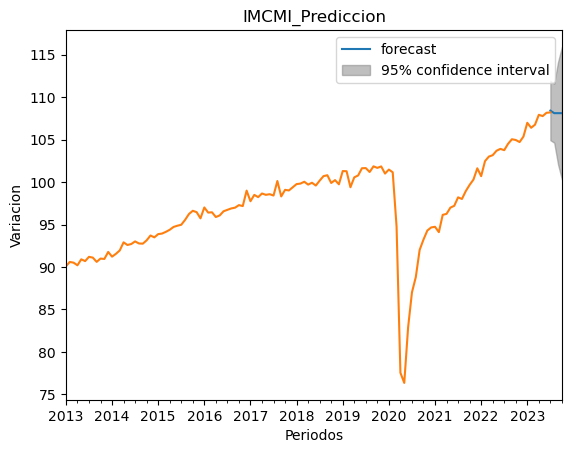

In [31]:
## Graficar pronostico
plot_predict(results,'2023-07-01','2023-10-01')
datos['IMCMI_SA'].plot();
plt.title('IMCMI_Prediccion')
plt.ylabel('Variacion')

## j) Mostrar en un print el pronóstico para agosto de 2023 con sus intervalos de confianza al 95%

In [32]:
print(f'pronosticamos que la semana que comienza el 29 de oct el euro estara en {df_forecast.iloc[0,0].round(2)}\n pero puede estar entre {df_forecast.iloc[0,1].round(2)} y {df_forecast.iloc[0,2].round(2)}')

pronosticamos que la semana que comienza el 29 de oct el euro estara en 108.12
 pero puede estar entre 104.64 y 111.6
